In [1]:
import numpy as np
import wandb
from tqdm import trange
from util.mnist.tools import *
from util.pickleInterface import *
from util.whatwhere.encoder import *
from util.whatwhere.decoder import *
from util.whatwhere.noise import *
from util.willshaw.memory import *
from util.willshaw.plot import *
from util.pytorch.tools import np_to_grid
from util.kldiv import *
from util.basic_utils import mse_detailed

ModuleNotFoundError: No module named 'util'

In [2]:
""" Code generation parameters """
rng = np.random.RandomState(0)  # reproducible
K = 20
Q = 21
n_epochs = 5
b = 0.8
wta = True
Fs = 2
T_what = 0.95

TRIAL_RUN = False
list_Pdel = [0, 0.05, 0.1, 0.15]  # each item in this list is a different wandb run

""" load mnist """
imgs, lbls, _, _ = read_mnist(n_train=60000)
I = imgs.shape[1]
J = imgs.shape[2]

""" generate codes """
features = compute_features(imgs, lbls, K, Fs, rng, n_epochs, b, verbose=False)
codes, polar_params = compute_codes(
    imgs,
    K,
    Q,
    features,
    T_what,
    wta,
    n_epochs,
    b,
    Fs,
    verbose=False,
)

In [3]:
code_size = codes.shape[1]

In [4]:
wn = AAWN(code_size)  # empty memory

In [7]:
wn.store(codes)

In [9]:
from util.whatwhere.generate import *

In [10]:
code_pd = compute_prob_dist(codes)

In [12]:
def avg_bits_per_code(codes):
    nnz = codes.nnz
    n_codes = codes.shape[0]
    return nnz / n_codes

In [13]:
print(avg_bits_per_code(codes))

17.1996


In [14]:
measure_sparsity(codes)

(0.0019500680272108843, 0.003061224489795918)

In [15]:
0.00195 * 8820

17.198999999999998

In [16]:
bits_per_code = np.sum(codes, axis=-1)

(array([   22.,    24.,   153.,  2074.,  6068., 15064., 14688., 16341.,
         5205.,   361.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

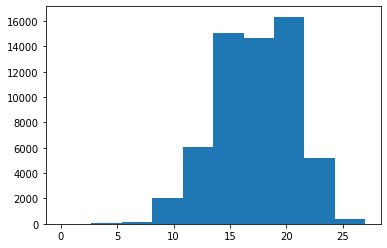

In [17]:
plt.hist(bits_per_code)

In [19]:
sample_codes = sample_from_dist(code_pd, n=60000)

In [20]:
bits_per_sample = np.sum(sample_codes, axis=-1)

(array([4.1000e+01, 6.2000e+02, 6.7810e+03, 1.3588e+04, 2.2163e+04,
        1.0551e+04, 5.2430e+03, 8.3700e+02, 1.6400e+02, 1.2000e+01]),
 array([ 2. ,  5.5,  9. , 12.5, 16. , 19.5, 23. , 26.5, 30. , 33.5, 37. ]),
 <BarContainer object of 10 artists>)

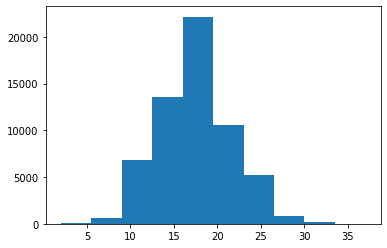

In [21]:
plt.hist(bits_per_sample)

In [22]:
examples = sample_codes[:100]

In [23]:
recons = recon_img_space(examples, features, None, Q, K)

In [25]:
from util.plot import *

In [27]:
def multiple_imshow(imgs, title=None, m=0, M=1):
    n_imgs = imgs.shape[0]
    bl = best_layout(n_imgs)
    fig, axs = plt.subplots(bl[0], bl[1])
    if title:
        fig.suptitle(title)

    for i, ax in enumerate(fig.axes):
        ax.imshow(imgs[i], vmin=m, vmax=M, cmap=plt.cm.gray)
        ax.set_xticks([])
        ax.set_yticks([])

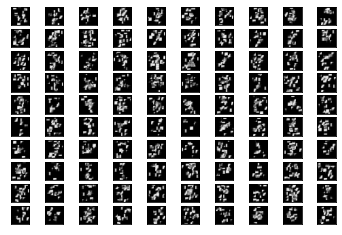

In [28]:
multiple_imshow(recons)

In [29]:
idxs = idxs_x_random_per_class(lbls,10)

In [30]:
examples = sample_codes[idxs]

In [31]:
examples.shape

(100, 8820)

In [32]:
recons = recon_img_space(examples, features, None, Q, K)

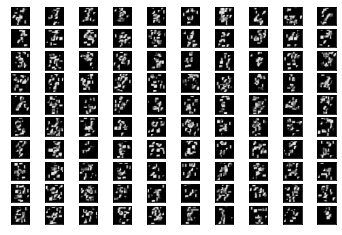

In [33]:
multiple_imshow(recons)

In [34]:
sample_ret = wn.retreive(sample_codes)

In [35]:
ret = wn.retreive(codes)

(array([   22.,    24.,   153.,  2074.,  6068., 15064., 14688., 16341.,
         5205.,   361.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

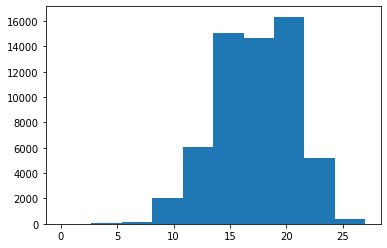

In [38]:
plt.hist(np.sum(codes, axis=-1))

(array([5.5002e+04, 4.6880e+03, 2.8800e+02, 1.7000e+01, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  91.9, 183.8, 275.7, 367.6, 459.5, 551.4, 643.3, 735.2,
        827.1, 919. ]),
 <BarContainer object of 10 artists>)

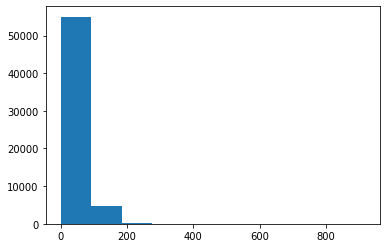

In [39]:
plt.hist(np.sum(ret, axis=-1))

In [41]:
avg_bits_per_code(codes)

17.1996

In [42]:
avg_bits_per_code(ret)

42.85433333333334

In [43]:
avg_bits_per_code(sample_codes)

17.219

In [44]:
avg_bits_per_code(sample_ret)

4.8878

In [45]:
sample_ret.shape

(60000, 8820)

(array([1.9000e+01, 5.3260e+03, 2.0474e+04, 9.9800e+03, 6.2210e+03,
        4.6380e+03, 2.9160e+03, 2.2440e+03, 1.7820e+03, 1.4020e+03,
        1.2030e+03, 8.6000e+02, 6.2200e+02, 5.3700e+02, 4.2600e+02,
        3.7700e+02, 2.4300e+02, 1.7800e+02, 1.4200e+02, 1.0000e+02,
        8.1000e+01, 6.4000e+01, 4.2000e+01, 3.2000e+01, 2.3000e+01,
        1.6000e+01, 1.0000e+01, 1.1000e+01, 4.0000e+00, 5.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

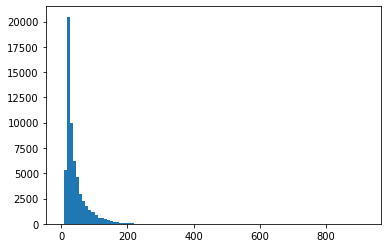

In [47]:
plt.hist(np.sum(ret, axis=-1), bins=100)

In [48]:
exs = codes[idxs]

In [49]:
recons = recon_img_space(exs, features, None, Q, K)

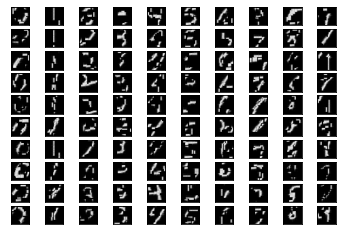

In [50]:
multiple_imshow(recons)

In [51]:
exs_ret = wn.retreive(exs)

In [52]:
recons = recon_img_space(exs_ret, features, None, Q, K)

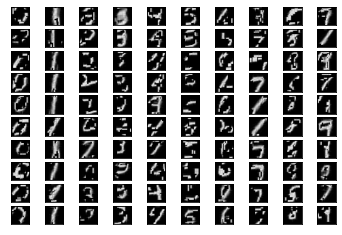

In [53]:
multiple_imshow(recons)

In [54]:
eights = codes[lbls == 8]

In [55]:
eights.shape

(5851, 8820)

In [56]:
dist = compute_prob_dist(eights)

In [57]:
samples = sample_from_dist(dist)

In [58]:
samples = sample_from_dist(dist, n=100)

In [59]:
samples.shape

(100, 8820)

In [60]:
avg_bits_per_code(samples)

17.91

In [61]:
ret8 = wn.retreive(samples)

In [62]:
avg_bits_per_code(ret8)

4.83

In [63]:
ret = wn.retreive(codes[lbls==8])

In [64]:
avg_bits_per_code(ret)

34.9735088019142

In [65]:
recons = recon_img_space(samples, features, None, Q, K)

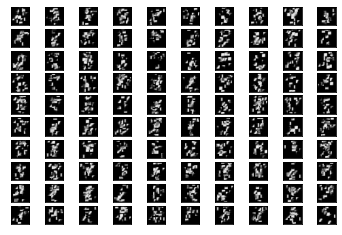

In [66]:
multiple_imshow(recons)

In [67]:
recons = recon_img_space(codes[lbls==8][:100], features, None, Q, K)

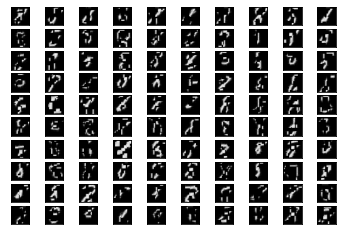

In [68]:
multiple_imshow(recons)

In [69]:
codes_salt = add_zero_noise(codes)

adding noise: 100%|██████████| 60000/60000 [00:19<00:00, 3054.89data-sample/s]


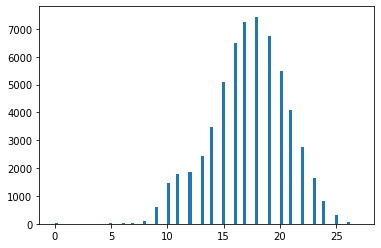

In [71]:
a = plt.hist(np.sum(codes, axis=-1), bins=100)

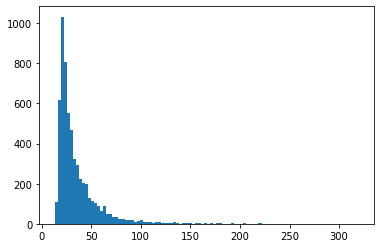

In [72]:
_ = plt.hist(np.sum(ret, axis=-1), bins=100)

In [73]:
codes_salt = add_zero_noise(codes)

adding noise: 100%|██████████| 60000/60000 [00:19<00:00, 3059.76data-sample/s]


In [74]:
avg_bits_per_code(codes)

17.1996

In [75]:
avg_bits_per_code(codes_salt)

15.475366666666666

In [76]:
ret_salt = wn.retreive(codes_salt)

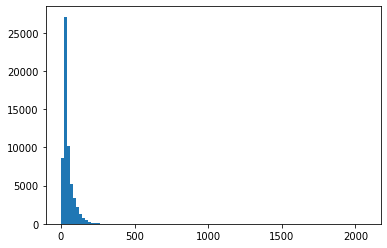

In [77]:
_ = plt.hist(np.sum(ret_salt, axis=-1), bins=100)

In [78]:
codes_pepper = add_one_noise_relative(codes)

adding noise: 100%|██████████| 60000/60000 [00:33<00:00, 1795.23data-sample/s]


In [79]:
avg_bits_per_code(codes_pepper)

18.925533333333334

In [80]:
avg_bits_per_code(codes)

17.1996

In [82]:
ret_pepper = wn.retreive(codes_pepper)

In [83]:
avg_bits_per_code(ret_pepper)

20.734283333333334

In [84]:
avg_bits_per_code(ret)

34.9735088019142

In [85]:
avg_bits_per_code(ret_salt)

48.812983333333335

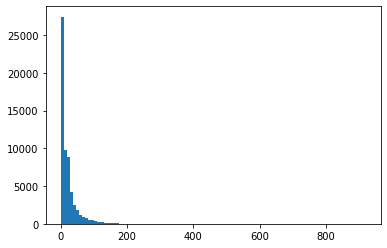

In [86]:
_ = plt.hist(np.sum(ret_pepper, axis=-1), bins=100)

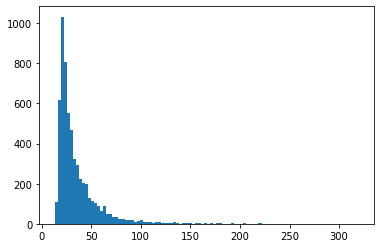

In [87]:
_ = plt.hist(np.sum(ret, axis=-1), bins=100)

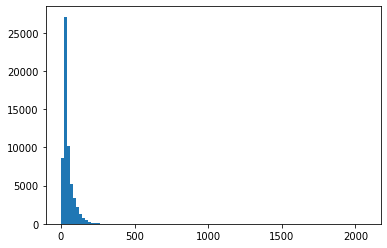

In [88]:
_ = plt.hist(np.sum(ret_salt, axis=-1), bins=100)

In [89]:
idxs = idxs_x_random_per_class(lbls)

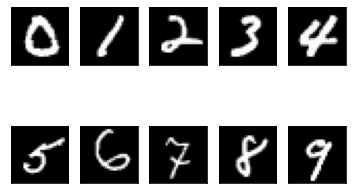

In [90]:
multiple_imshow(imgs[idxs])

In [94]:
recons = recon_img_space(codes[idxs], features, Q, K)

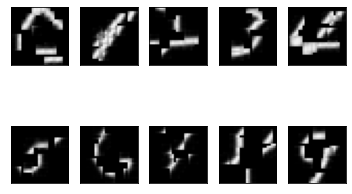

In [96]:
multiple_imshow(recon_img_space(codes[idxs], features, Q, K))

In [98]:
ret.shape

(5851, 8820)

In [99]:
codes.shape

(60000, 8820)

In [101]:
ret = wn.retreive(codes)

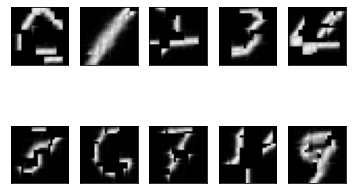

In [102]:
multiple_imshow(recon_img_space(ret[idxs], features, Q, K))

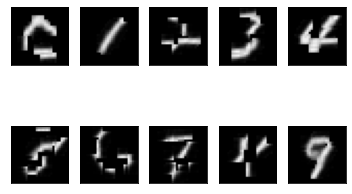

In [105]:
multiple_imshow(recon_with_polar(ret[idxs], features, polar_params[idxs], Q, K))

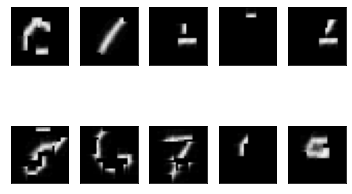

In [106]:
multiple_imshow(recon_with_polar(ret_pepper[idxs], features, polar_params[idxs], Q, K))

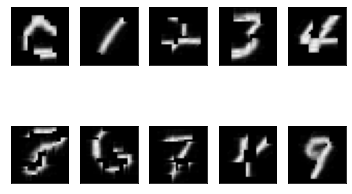

In [107]:
multiple_imshow(recon_with_polar(ret_salt[idxs], features, polar_params[idxs], Q, K))

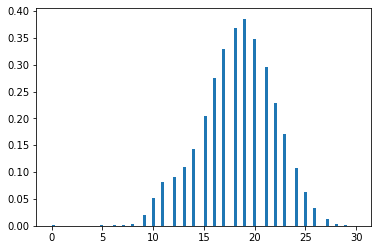

In [108]:
retrieve_hist(codes_pepper, wn.W)

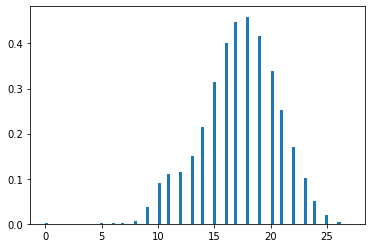

In [109]:
retrieve_hist(codes, wn.W)

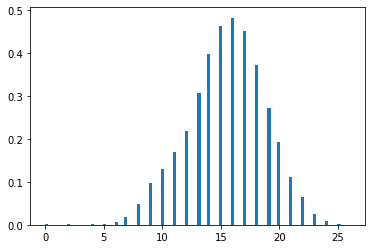

In [110]:
retrieve_hist(codes_salt, wn.W)

In [115]:
s = csr_matrix.dot(codes, wn.W)

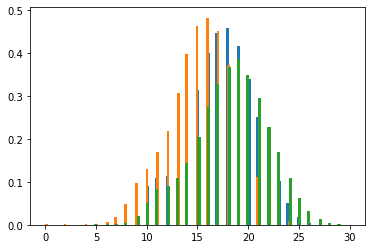

In [118]:
retrieve_hist(codes, wn.W)
retrieve_hist(codes_salt, wn.W)
retrieve_hist(codes_pepper, wn.W)

In [120]:
ones = codes[lbls==1]

In [121]:
d1 = compute_prob_dist(ones)

In [122]:
gen1 = sample_from_dist(d1, n=100)

In [125]:
r = wn.retreive(gen1)

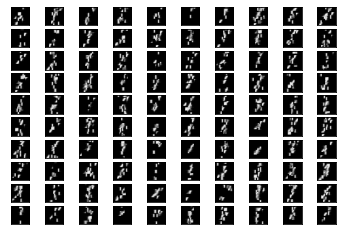

In [127]:
multiple_imshow(recon_no_polar(gen1,features,Q,K))

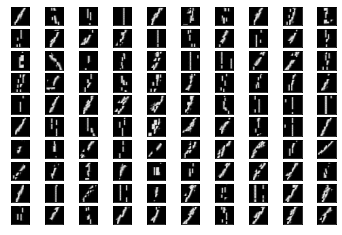

In [128]:
multiple_imshow(recon_no_polar(ones[:100],features,Q,K))

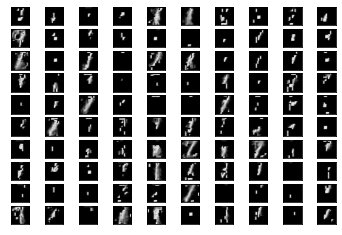

In [129]:
multiple_imshow(recon_no_polar(r,features,Q,K))

In [130]:
r = wn.retreive(add_zero_noise(gen1))

adding noise: 100%|██████████| 100/100 [00:00<00:00, 2133.22data-sample/s]


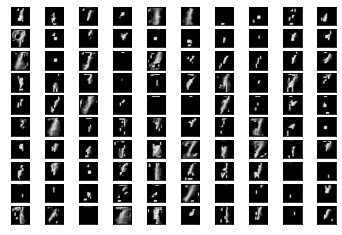

In [131]:
multiple_imshow(recon_no_polar(r,features,Q,K))

In [132]:
avg_bits_per_code(r)

40.45

In [133]:
avg_bits_per_code(ret)

42.85433333333334

In [135]:
r = wn.retreive(add_zero_noise(gen1, prob=0.2))

adding noise: 100%|██████████| 100/100 [00:00<00:00, 2133.50data-sample/s]


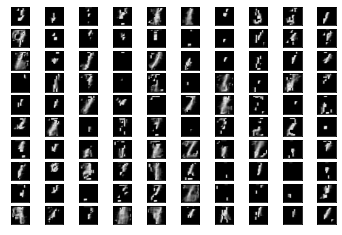

In [136]:
multiple_imshow(recon_no_polar(r,features,Q,K))

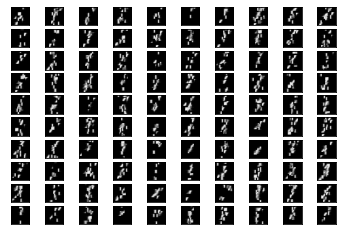

In [137]:
multiple_imshow(recon_no_polar(gen1,features,Q,K))

In [140]:
salt = add_zero_noise(codes[:100], prob=0.5)

adding noise: 100%|██████████| 100/100 [00:00<00:00, 2133.55data-sample/s]


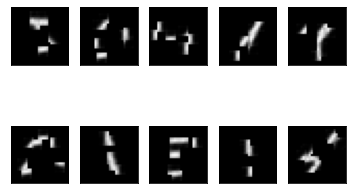

In [142]:
multiple_imshow(recon_with_polar(salt[:10], features, polar_params[:10],Q,K))

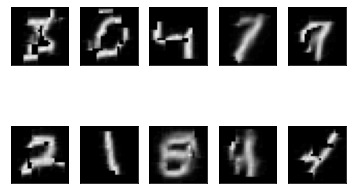

In [144]:
multiple_imshow(recon_with_polar(wn.retreive(salt[:10]), features, polar_params[:10],Q,K))

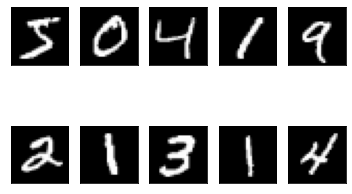

In [145]:
multiple_imshow(imgs[:10])

In [146]:
wn.forget()

In [147]:
codes.shape

(60000, 8820)

In [148]:
t = codes[lbls==2]

In [149]:
t.shape

(5958, 8820)

In [150]:
wn.store(t)

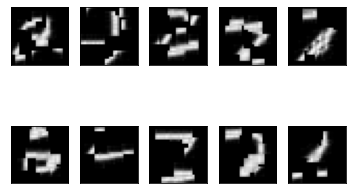

In [151]:
multiple_imshow(recon_no_polar(t[:10], features, Q,K))

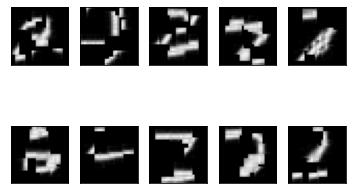

In [153]:
multiple_imshow(recon_no_polar(wn.retreive(t[:10]), features, Q,K))

In [154]:
codes.shape

(60000, 8820)

In [155]:
sevens = codes[lbls == 7]

In [156]:
wn.n_stored

5958

In [157]:
wn.forget()

In [158]:
wn.store(codes)

In [160]:
r7 = wn.retreive(sevens)

In [161]:
d7 = compute_prob_dist(r7)

In [162]:
s7 = sample_from_dist(d7,n=10)

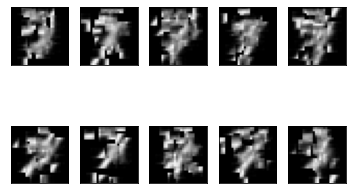

In [163]:
multiple_imshow(recon_no_polar(s7,features,Q,K))

In [164]:
d7 = compute_prob_dist(sevens)

In [165]:
sevens.shape

(6265, 8820)

In [166]:
s7 = sample_from_dist(d7, n=10)

In [167]:
r7 = wn.retreive(s7)

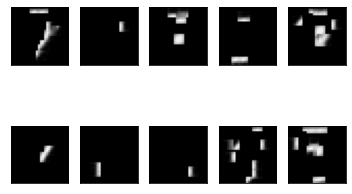

In [168]:
multiple_imshow(recon_no_polar(r7,features,Q,K))

In [169]:
avg_bits_per_code(r7)

6.1

In [170]:
avg_bits_per_code(s7)

18.1

In [171]:
avg_bits_per_code(sevens)

15.910774142059058

In [172]:
avg_bits_per_code(wn.retreive(sevens))

52.27853152434158

In [173]:
codes.shape

(60000, 8820)

In [174]:
ret.shape

(60000, 8820)

In [177]:
def err_hamming_distance_detailed(codes, ret):
    """
    Negative&Positive version of hamming distance.
    Computes the hamming distance from extra bits (0s that become 1s),
    and from lost bits (1s that become 0s)
    @param codes: 2D csr_matrix with original codes
    @param ret: 2D csr_matrix with memory output
    @return err_extra
    @return err_lost
    """
    diff = (codes - ret).toarray()

    extra_bits = np.count_nonzero(diff == -1)
    lost_bits = np.count_nonzero(diff == 1)

    total_bits = ret.shape[0] * ret.shape[1]

    hamm_dist = (extra_bits+lost_bits)/total_bits

    return (extra_bits / total_bits, lost_bits / total_bits, hamm_dist )

In [178]:
err_hamming_distance_detailed(codes, ret)

(0.00290869992441421, 0.0, 0.00290869992441421)

In [179]:
err_hamming_distance(codes, ret)

0.00290869992441421

In [180]:
codes_pepper = add_one_noise_relative(codes)

adding noise: 100%|██████████| 60000/60000 [00:38<00:00, 1555.29data-sample/s]


In [181]:
ret_pepper = wn.retreive(codes_pepper)

In [182]:
err_hamming_distance_detailed(codes_pepper, ret_pepper)

(0.0014713888888888888, 0.0012627721088435374, 0.0027341609977324264)

In [183]:
codes_salt = add_zero_noise(codes[:10000])

adding noise: 100%|██████████| 10000/10000 [00:03<00:00, 3106.81data-sample/s]


In [184]:
ret_salt=wn.retreive(codes_salt)

In [185]:
err_hamming_distance_detailed(codes_salt, ret_salt)

(0.003836780045351474, 0.0, 0.003836780045351474)

In [186]:
c = codes[:100]
avg_bits_per_code(c)
r = wn.retreive(c)
avg_bits_per_code(r)

40.37

In [187]:
c = codes[:100]
print(avg_bits_per_code(c))
r = wn.retreive(c)
print(avg_bits_per_code(r))

16.78


40.37


In [188]:
c = add_zero_noise(codes[:100])
print(avg_bits_per_code(c))
r = wn.retreive(c)
print(avg_bits_per_code(r))

adding noise: 100%|██████████| 100/100 [00:00<00:00, 3200.27data-sample/s]


15.21


45.7


In [189]:
c = add_zero_noise(codes[:100], prob=0.2)
print(avg_bits_per_code(c))
r = wn.retreive(c)
print(avg_bits_per_code(r))

adding noise: 100%|██████████| 100/100 [00:00<00:00, 2133.66data-sample/s]


13.37


53.7


In [190]:
c = add_zero_noise(codes[:100], prob=0.3)
print(avg_bits_per_code(c))
r = wn.retreive(c)
print(avg_bits_per_code(r))

adding noise: 100%|██████████| 100/100 [00:00<00:00, 2133.08data-sample/s]


12.01


63.21


In [191]:
c = add_one_noise_relative(codes[:100], Prepl=0.1)
print(avg_bits_per_code(c))
r = wn.retreive(c)
print(avg_bits_per_code(r))

adding noise: 100%|██████████| 100/100 [00:00<00:00, 1280.02data-sample/s]


18.39


17.58


In [192]:
c = add_one_noise_relative(codes[:100], Prepl=0.2)
print(avg_bits_per_code(c))
r = wn.retreive(c)
print(avg_bits_per_code(r))

adding noise: 100%|██████████| 100/100 [00:00<00:00, 800.06data-sample/s]


20.06


11.79


In [193]:
c = add_one_noise_relative(codes[:100], Prepl=0.3)
print(avg_bits_per_code(c))
r = wn.retreive(c)
print(avg_bits_per_code(r))

adding noise: 100%|██████████| 100/100 [00:00<00:00, 492.30data-sample/s]


22.15


7.47


In [194]:
c = add_one_noise_relative(codes[:100], Prepl=0.5)
print(avg_bits_per_code(c))
r = wn.retreive(c)
print(avg_bits_per_code(r))

adding noise: 100%|██████████| 100/100 [00:00<00:00, 336.86data-sample/s]


25.18


5.4


In [196]:
dist = compute_prob_dist(codes[lbls==1])

In [197]:
samples = sample_from_dist(dist, n=100)

(array([ 5., 16., 13., 18., 11., 20., 13.,  1.,  1.,  2.]),
 array([ 5. ,  6.6,  8.2,  9.8, 11.4, 13. , 14.6, 16.2, 17.8, 19.4, 21. ]),
 <BarContainer object of 10 artists>)

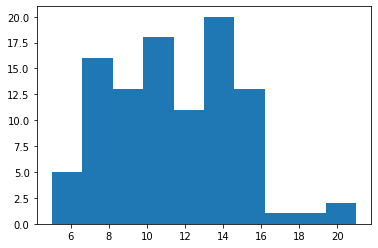

In [198]:
plt.hist(np.sum(samples,axis=-1))

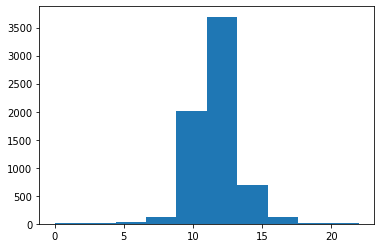

In [199]:
_=plt.hist(np.sum(codes[lbls==1],axis=-1))

In [200]:
wn.n_stored

60000

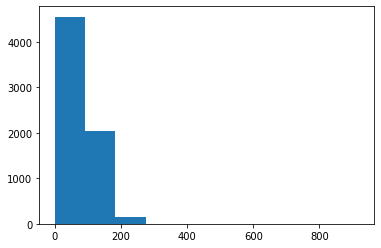

In [201]:
_=plt.hist(np.sum(wn.retreive(codes[lbls==1]),axis=-1))

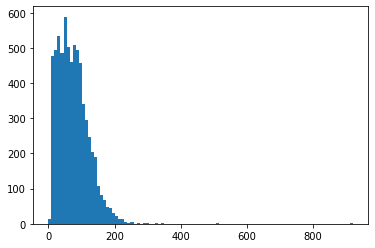

In [202]:
_=plt.hist(np.sum(wn.retreive(codes[lbls==1]),axis=-1), bins=100)

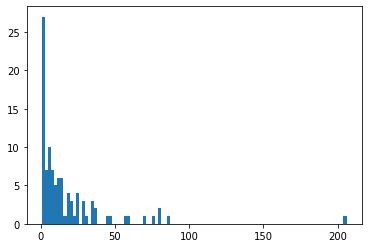

In [204]:
_=plt.hist(np.sum(wn.retreive(samples),axis=-1), bins=100)